<a href="https://colab.research.google.com/github/Meet200/-Algorithms-in-python/blob/master/Industry_ML_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

About this file

What are the things that a potential home buyer considers before purchasing a house? The location, the size of the property, vicinity to offices, schools, parks, restaurants, hospitals or the stereotypical white picket fence? What about the most important factor — the price?

Now with the lingering impact of demonetization, the enforcement of the Real Estate (Regulation and Development) Act (RERA), and the lack of trust in property developers in the city, housing units sold across India in 2017 dropped by 7 percent. In fact, the property prices in Bengaluru fell by almost 5 percent in the second half of 2017, said a study published by property consultancy Knight Frank.
For example, for a potential homeowner, over 9,000 apartment projects and flats for sale are available in the range of ₹42-52 lakh, followed by over 7,100 apartments that are in the ₹52-62 lakh budget segment, says a report by property website Makaan. According to the study, there are over 5,000 projects in the ₹15-25 lakh budget segment followed by those in the ₹34-43 lakh budget category.

Buying a home, especially in a city like Bengaluru, is a tricky choice. While the major factors are usually the same for all metros, there are others to be considered for the Silicon Valley of India. With its help millennial crowd, vibrant culture, great climate and a slew of job opportunities, it is difficult to ascertain the price of a house in Bengaluru.

In [ ]:
# Very basic libraries to work with numpy and import data from Google drive 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib


In [ ]:
from google.colab import drive # to import Google drive
drive.mount('/content/drive') # mounting Google drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/"My Drive/Colab Notebooks/industry" 

/content/drive/My Drive/Colab Notebooks/industry


In [ ]:
dataset = pd.read_csv("Train.csv") # Assigning data to a variable called “dataset”. 
print(dataset)#printing dataset

                  area_type   availability  ... balcony   price
0      Super built-up  Area         19-Dec  ...     1.0   39.07
1                Plot  Area  Ready To Move  ...     3.0  120.00
2            Built-up  Area  Ready To Move  ...     3.0   62.00
3      Super built-up  Area  Ready To Move  ...     1.0   95.00
4      Super built-up  Area  Ready To Move  ...     1.0   51.00
...                     ...            ...  ...     ...     ...
13315        Built-up  Area  Ready To Move  ...     0.0  231.00
13316  Super built-up  Area  Ready To Move  ...     NaN  400.00
13317        Built-up  Area  Ready To Move  ...     1.0   60.00
13318  Super built-up  Area         18-Jun  ...     1.0  488.00
13319  Super built-up  Area  Ready To Move  ...     1.0   17.00

[13320 rows x 9 columns]


In [ ]:
dataset.shape  # finding shape (size) of dataset

(13320, 9)

In [ ]:
dataset.describe() #finding information from dataset this will only show details for numerical data

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [ ]:
dataset.columns #finding columns names of dataset

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

Now we find out the columns names of the dataset, so based on that we will find out information for different columns present in the dataset.

In [ ]:
# count of flats with different areas type
dataset['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

As we can see in above output that there are total 4 types of area detail availbel whixh is plot Area, Carpet Area, Build-Up Area and Super Build-Up area.

In [ ]:
# removing unnecessary columns like , area type, availability ,balcony type 
dataset2 = dataset.drop(['area_type','society','balcony','availability'],axis='columns')


In [ ]:
# dataset shape before and after of removing  unnecessary columns
print(dataset.shape)
print(dataset2.shape)  # finding shape of data after droping some columns

(13320, 9)
(13320, 5)


Data cleaning 

In [ ]:
#first step in data-cleaing is to find null values and remove it 
dataset2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

we can see that size of house and bath columns is having maximum Null values

In [ ]:
dataset3 = dataset2.dropna() # removing NULL values

In [ ]:
# there will be no null values now
dataset3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [ ]:
#dataset shape before and after droping null values
print(dataset2.shape)
print(dataset3.shape)

(13320, 5)
(13246, 5)


In [ ]:
dataset3['size'].unique() # finding unique value present in size column

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

now as we know that size columns contains string type data also we need only number of bedrooms so will create another column which contain integer value of size

In [ ]:
dataset3['size_bhk'] = dataset3['size'].apply(lambda x: int(x.split(' ')[0])) # spliting data and taking integet value in column 'size_bhk'
dataset3.size_bhk.unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [ ]:
type(dataset3['total_sqft']) 

pandas.core.series.Series

Now dataset contains total sqft details of house which is in string format so we need to convert it into the float format so that we can compupte it.

In [ ]:
# function to convert string to float 
def str_to_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [ ]:
# converting total_sqft area from string to float 
dataset3[~dataset3['total_sqft'].apply(str_to_float)]

,location,size,total_sqft,bath,price,size_bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


there are some data which contains '-' character so we need to remove it and add new value by averaging the other values

In [ ]:
# function which will remove '-'  from dataset
def remove_for_sqft(x):
    tokens = x.split('-')
    if len(tokens) ==2:
        return (float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [ ]:
# removing '-' from dataset and adding average value in dataset
dataset4 = dataset3.copy()
dataset4.total_sqft = dataset4.total_sqft.apply(remove_for_sqft)
dataset4 = dataset4[dataset4.total_sqft.notnull()]
dataset4

,location,size,total_sqft,bath,price,size_bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


Now we have to find-out price per square feet for any house and add new column for the same

In [ ]:
# converting price value into float
dataset4[~dataset4['price'].apply(str_to_float)]
print(dataset4)

                       location       size  total_sqft  bath   price  size_bhk
0      Electronic City Phase II      2 BHK      1056.0   2.0   39.07         2
1              Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00         4
2                   Uttarahalli      3 BHK      1440.0   2.0   62.00         3
3            Lingadheeranahalli      3 BHK      1521.0   3.0   95.00         3
4                      Kothanur      2 BHK      1200.0   2.0   51.00         2
...                         ...        ...         ...   ...     ...       ...
13315                Whitefield  5 Bedroom      3453.0   4.0  231.00         5
13316             Richards Town      4 BHK      3600.0   5.0  400.00         4
13317     Raja Rajeshwari Nagar      2 BHK      1141.0   2.0   60.00         2
13318           Padmanabhanagar      4 BHK      4689.0   4.0  488.00         4
13319              Doddathoguru      1 BHK       550.0   1.0   17.00         1

[13200 rows x 6 columns]


In [ ]:
# finding price/sqft for any house just for information
dataset5 = dataset4.copy()
dataset5['price_per_sqft'] = dataset5['price']*100000  # price/sqft considring price in lakhs
dataset5['price_per_sqft'] = dataset5['price_per_sqft']/dataset5['total_sqft'] 
dataset5.head() 

,location,size,total_sqft,bath,price,size_bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [ ]:
dataTypeSeries = dataset5.dtypes
dataTypeSeries #checking datatype if need to convert 

location           object
size               object
total_sqft        float64
bath              float64
price             float64
size_bhk            int64
price_per_sqft    float64
dtype: object

Now will try to describe data of location

In [ ]:
# total unique records for location
len(dataset5.location.unique())

1298

In [ ]:
BHK_House = dataset5.groupby('size_bhk')['size_bhk'].agg('count').sort_values(ascending=False)
BHK_House

size_bhk
2     5517
3     4818
4     1390
1      640
5      349
6      220
7      100
8       88
9       52
10      14
11       4
27       1
12       1
13       1
14       1
16       1
18       1
19       1
43       1
Name: size_bhk, dtype: int64

finding number of house in every area 

In [ ]:
# total repeation in location 
dataset5.location = dataset5.location.apply(lambda x: x.strip())
location_stats = dataset5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield              533
Sarjapur  Road          392
Electronic City         304
Kanakpura Road          264
Thanisandra             235
                       ... 
Kumbhena Agrahara         1
Kudlu Village,            1
Konappana Agrahara        1
Kodanda Reddy Layout      1
1 Annasandrapalya         1
Name: location, Length: 1287, dtype: int64

We are having more then 1287 diffrent location in our dataset and for regression we are going to apply one hot endoing technique so if we directly apply on present dataset then will be having toomuch large number of columns so will merge some of the classes and commanly call it as 'others'

In [ ]:
# finding location which are very rarely used (<10)
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
Dodsworth Layout        10
BTM 1st Stage           10
Sadashiva Nagar         10
Thyagaraja Nagar        10
Kalkere                 10
                        ..
Kumbhena Agrahara        1
Kudlu Village,           1
Konappana Agrahara       1
Kodanda Reddy Layout     1
1 Annasandrapalya        1
Name: location, Length: 1047, dtype: int64

In [ ]:
# assiging vallue as other to location repeated < 10 time
dataset5.location = dataset5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(dataset5.location.unique())

241

In [ ]:
# there are some data which has value of BHK(size) very big so will try to not include those data
dataset6 = dataset5[~(dataset5.total_sqft/dataset5.size_bhk<300)]
dataset6.shape

(12456, 7)

Text(0, 0.5, 'Count')

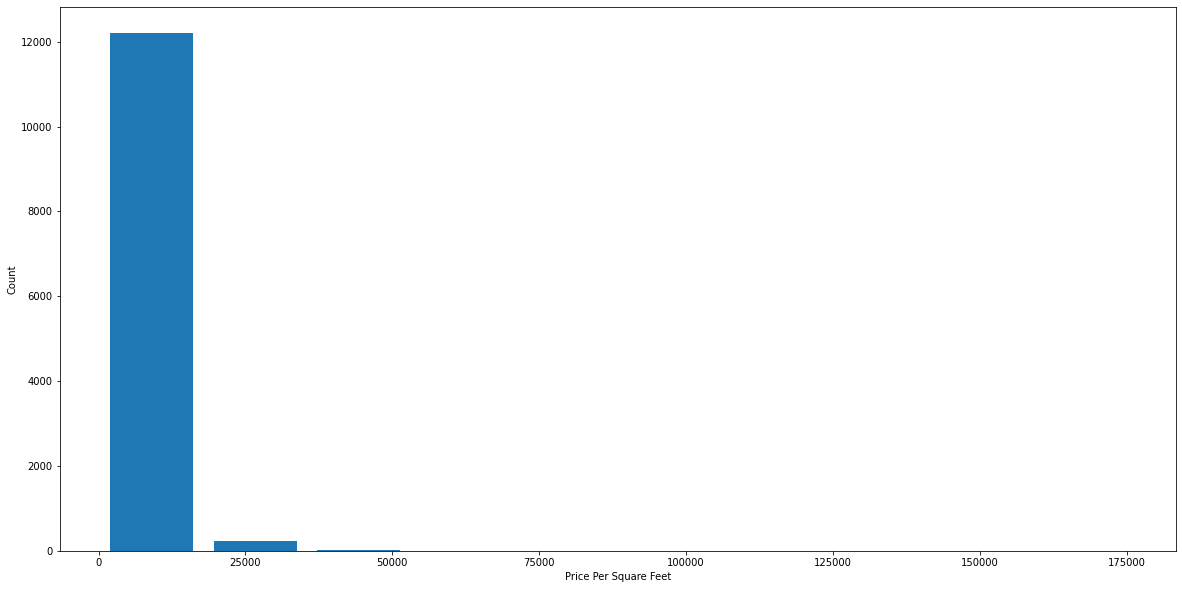

In [ ]:
# ploating price per square feet v/s number of house/flat
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(dataset6.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

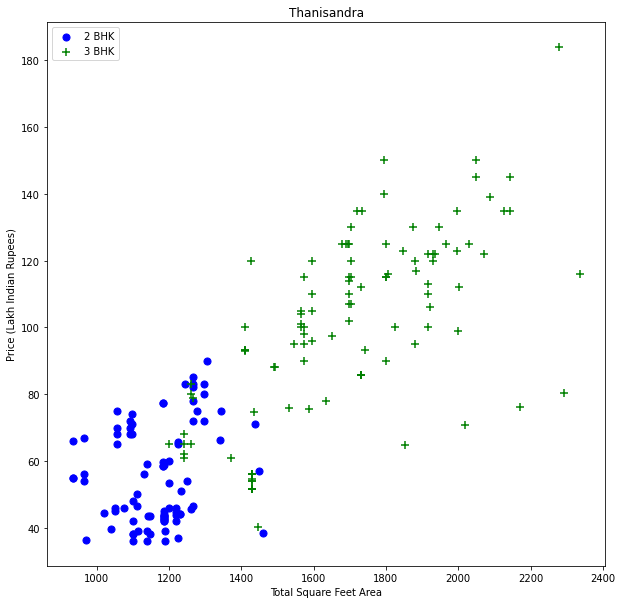

In [ ]:
# scatter plot of 2 & 3 BHK house in any selected area
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.size_bhk==2)]
    bhk3 = df[(df.location==location) & (df.size_bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (10,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(dataset6,"Thanisandra") #scatter plot for Thanisandra 

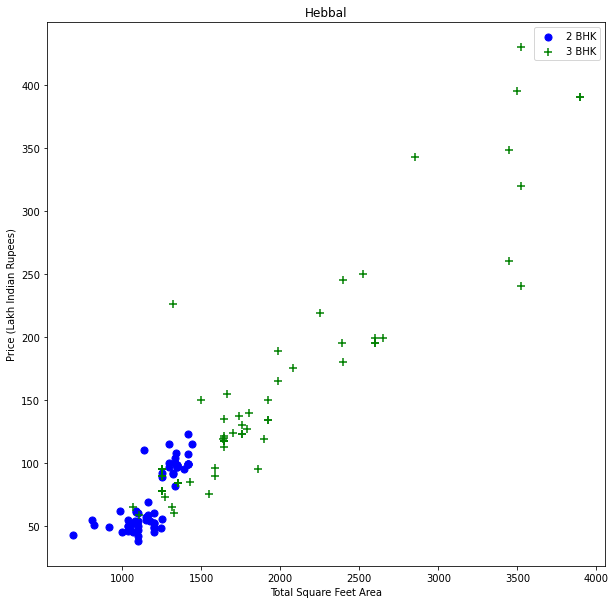

In [ ]:
plot_scatter_chart(dataset6,"Hebbal")#scatter plot for Hebbal 

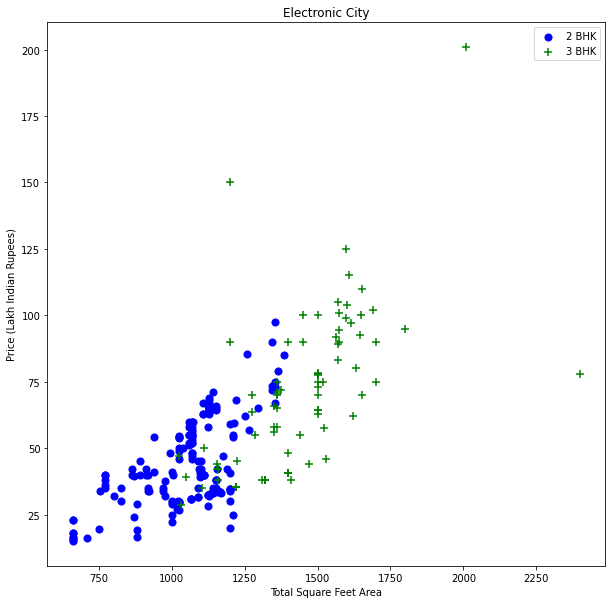

In [ ]:
plot_scatter_chart(dataset6,"Electronic City")#scatter plot for Hebbal 

Here we can see data is scattered in Linear form mostly so we can use techniques like linear regression or lasso or ridge regression 

As we know we are having many diffrent classes for location so will use one hot encoding for location.

In [ ]:
dummies = pd.get_dummies(dataset6.location) # applying one hot encoding technique
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 2nd Stage,BTM Layout,Babusapalaya,Badavala Nagar,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banashankari Stage VI,Banaswadi,Banjara Layout,Bannerghatta,Bannerghatta Road,Basavangudi,Basaveshwara Nagar,...,Sanjay nagar,Sarakki Nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shivaji Nagar,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Tindlu,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#concatanating not hot endoing  values
dataset6 = pd.concat([dataset6,dummies],axis='columns')
dataset6.head() 


,location,size,total_sqft,bath,price,size_bhk,price_per_sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 2nd Stage,BTM Layout,Babusapalaya,Badavala Nagar,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,...,Sanjay nagar,Sarakki Nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shivaji Nagar,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Tindlu,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
dataset7 = dataset6.drop('location',axis='columns') # preparing dataset to apply regression techniques
dataset7 = dataset7.drop('size',axis='columns')


Building of model

In [ ]:
# defining target varibles and features 
X = dataset7.drop(['price'],axis='columns') 
y = dataset7.price
print("X_shape", X.shape)
print("y_shape", y.shape)

X_shape (12456, 245)
y_shape (12456,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10) # spliting into 20(test)-80(train)


In [ ]:
# Linear regresson
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train,y_train)
regression.score(X_test,y_test)

0.7926222597511906

we can see that we are getting 79% accuracy score for this model

In [ ]:
#Lasso regression
from sklearn import linear_model
regression2 = linear_model.Lasso(alpha=0.05)
regression2.fit(X_train,y_train)
regression2.score(X_test,y_test)

0.7923245728236419

In [ ]:
#ridge regression
from sklearn.linear_model import Ridge
regression3 = Ridge(alpha=0.1)
regression3.fit(X_train,y_train)
regression3.score(X_test,y_test)

0.7926987079682799

As we can see we are getting same accuracy and all 3 techniques so will go with simple linear regression

Testing -> predicting price for diffrent house prices

In [ ]:
test_dataset = pd.read_csv("Test.csv") # Assigning data to a variable called test_dataset. 
print(test_dataset)#printing test_dataset

                 area_type   availability  ... balcony price
0     Super built-up  Area  Ready To Move  ...     2.0   NaN
1               Plot  Area  Ready To Move  ...     2.0   NaN
2               Plot  Area         18-Apr  ...     2.0   NaN
3     Super built-up  Area  Ready To Move  ...     1.0   NaN
4     Super built-up  Area  Ready To Move  ...     1.0   NaN
...                    ...            ...  ...     ...   ...
1475  Super built-up  Area  Ready To Move  ...     1.0   NaN
1476  Super built-up  Area  Ready To Move  ...     2.0   NaN
1477  Super built-up  Area  Ready To Move  ...     2.0   NaN
1478        Built-up  Area         18-Feb  ...     1.0   NaN
1479        Built-up  Area  Ready To Move  ...     2.0   NaN

[1480 rows x 9 columns]


we need to create separate column for BHK size of test data and also some data are having '-' range value so we need to change those values also and will also remove some unnecessary data

In [ ]:
test_dataset = test_dataset.drop(['area_type','society','balcony','availability'],axis='columns') # removing some features from test data


In [ ]:
#cleaning null values
test_dataset.isnull().sum()

location         0
size             2
total_sqft       0
bath             7
price         1480
dtype: int64

In [ ]:
test_dataset.shape

(1480, 5)

In [ ]:
test_dataset =test_dataset.dropna(subset=['size', 'bath']) # removing NULL values

In [ ]:
test_dataset.shape

(1473, 5)

In [ ]:
#removing '-' from dataset
test_dataset.total_sqft = test_dataset.total_sqft.apply(remove_for_sqft)
test_dataset = test_dataset[test_dataset.total_sqft.notnull()]
test_dataset

,location,size,total_sqft,bath,price
0,Brookefield,2 BHK,1225.0,2.0,NaN
1,Akshaya Nagar,9 Bedroom,2400.0,9.0,NaN
2,Hennur Road,4 Bedroom,1650.0,5.0,NaN
3,Kodichikkanahalli,3 BHK,1322.0,3.0,NaN
4,Konanakunte,2 BHK,1161.0,2.0,NaN
...,...,...,...,...,...
1475,Vittasandra,2 BHK,1246.0,2.0,NaN
1476,Gottigere,3 BHK,1660.0,3.0,NaN
1477,Channasandra,2 BHK,1216.0,2.0,NaN
1478,Tumkur Road,2 BHK,996.0,2.0,NaN


In [ ]:
test_dataset['size_bhk'] = test_dataset['size'].apply(lambda x: int(x.split(' ')[0])) # spliting data and taking integet value in column 'size_bhk'
test_dataset

,location,size,total_sqft,bath,price,size_bhk
0,Brookefield,2 BHK,1225.0,2.0,NaN,2
1,Akshaya Nagar,9 Bedroom,2400.0,9.0,NaN,9
2,Hennur Road,4 Bedroom,1650.0,5.0,NaN,4
3,Kodichikkanahalli,3 BHK,1322.0,3.0,NaN,3
4,Konanakunte,2 BHK,1161.0,2.0,NaN,2
...,...,...,...,...,...,...
1475,Vittasandra,2 BHK,1246.0,2.0,NaN,2
1476,Gottigere,3 BHK,1660.0,3.0,NaN,3
1477,Channasandra,2 BHK,1216.0,2.0,NaN,2
1478,Tumkur Road,2 BHK,996.0,2.0,NaN,2


In [ ]:
test_dataset.shape

(1471, 6)

In [ ]:
#Testing on Test dataset
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return regression.predict([x])[0]

In [ ]:
predict_price(test_dataset.location[1],test_dataset.total_sqft[1], test_dataset.bath[1], test_dataset.size_bhk[1]) # predicting price from testing dataset

157.3887448310852

In [ ]:
predict_price("other",1800, 3, 3) #predicting value from random data

10.552270889282227

In [ ]:
predict_price("Electronic City",1800, 3, 3) #predicting value from random data

13.58362865447998